In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statistics
import math

In [4]:
df = pd.read_csv(r"C:\Users\sk062\Documents\Data\Google Search\Search.csv")
Data = pd.DataFrame(df)
Data["Data"] = pd.to_datetime(Data["Data"])
# 'month' 列を作成
Data['month'] = Data['Data'].dt.month
# 'date' 列を作成
Data['day'] = Data['Data'].dt.day
# 'week_number' 列を作成
Data["week_number"] = Data["Data"].dt.isocalendar().week

In [5]:
Data_Check = Data.drop(["Data","month","day","week_number"],axis=1)
Data_Check.head()

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0,43,22,62,6
1,47,22,65,4
2,51,26,100,3
3,44,20,74,4
4,41,23,68,4


In [6]:
Data_Check.describe()

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
count,262.000000,262.000000,262.000000,262.000000
mean,48.667939,30.637405,44.835878,7.522901
std,9.574493,8.460536,13.273998,5.787873
min,19.000000,15.000000,22.000000,2.000000
25%,43.000000,23.250000,34.250000,4.000000
50%,48.000000,30.500000,43.000000,6.000000
75%,53.000000,37.000000,52.000000,8.000000
max,94.000000,60.000000,100.000000,32.000000


In [7]:
print("AIRJORDANの検索数の最頻値",statistics.mode( Data["AIR JORDAN"] ))
print("AIRFORCEの検索数の最頻値",statistics.mode( Data["AIR FORCE"] ))
print("AIRMAXの検索数の最頻値",statistics.mode( Data["AIR MAX"] ))
print("DUNKの検索数の最頻値",statistics.mode( Data["DUNK"] ))

AIRJORDANの検索数の最頻値 43
AIRFORCEの検索数の最頻値 39
AIRMAXの検索数の最頻値 46
DUNKの検索数の最頻値 6


In [8]:
bins = [0,10,20,30,40,50,60,70,80,90,100]

# 各カラムの度数分布を計算
freq_tables = {}
for col in Data_Check.columns:
    freq = pd.cut(Data_Check[col], bins=bins).value_counts().sort_index()
    freq_tables[col] = freq

# 結果をデータフレームにまとめる
freq_df = pd.DataFrame(freq_tables)
freq_df.index = [f"{interval.left}~{interval.right}" for interval in freq_df.index]

# 度数分布表の出力
print("度数分布表")
freq_df

度数分布表


,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0~10,0,0,0,213
10~20,1,38,0,35
20~30,5,93,34,13
30~40,28,103,78,1
40~50,129,25,75,0
50~60,70,3,38,0
60~70,21,0,28,0
70~80,7,0,7,0
80~90,0,0,0,0
90~100,1,0,2,0


各スニーカーの検索数のヒストグラム


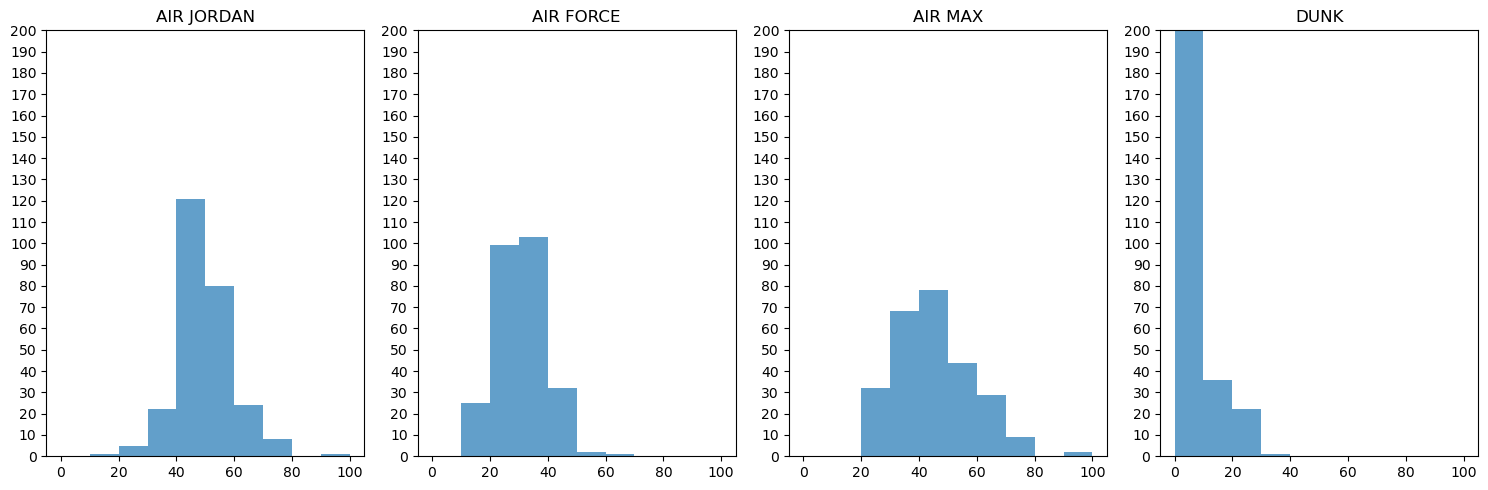

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, col in enumerate(Data_Check.columns):
    ax = axes[i]
    df[col].hist(bins=bins, ax=ax, alpha=0.7, grid=False)
    ax.set_ylim(0, 200)
    ax.set_yticks(range(0, 201, 10))
    ax.set_title(col)

plt.tight_layout()

print("各スニーカーの検索数のヒストグラム")
plt.show()


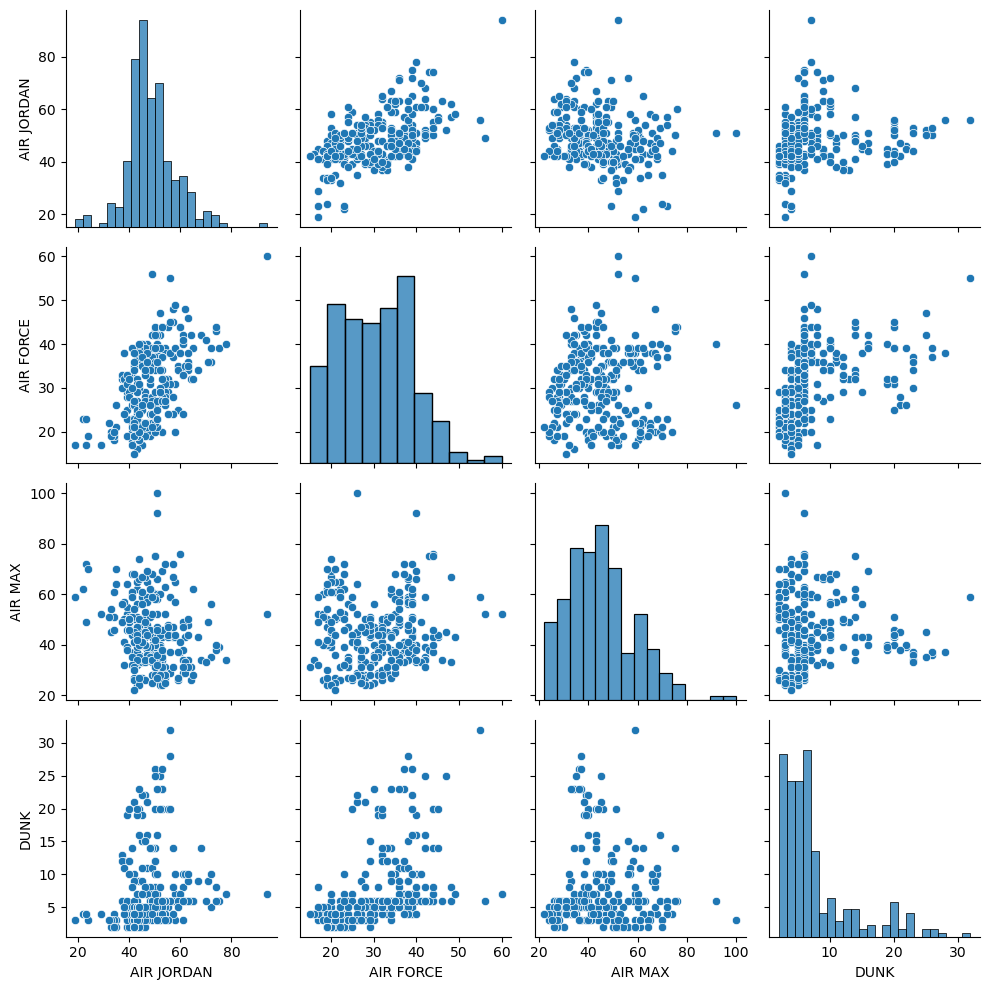

In [10]:
# ペアプロットの作成
sns.pairplot(Data_Check)

# グラフの表示
plt.tight_layout()
plt.show()

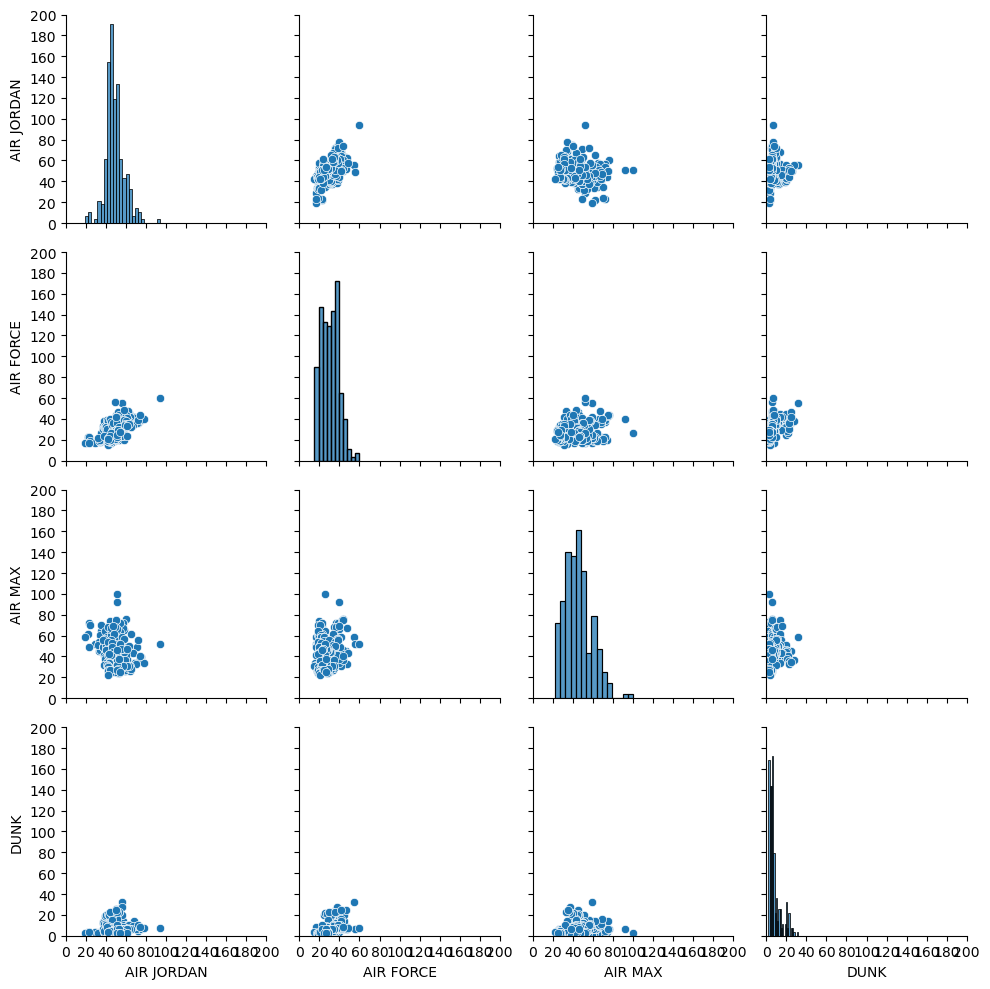

In [11]:
# ペアプロットの作成
pairplot = sns.pairplot(Data_Check)

# 各軸の範囲と目盛りを設定
for ax in pairplot.axes.flatten():  # 各プロットの軸にアクセス
    if ax is not None:  # 空の軸が存在する可能性があるためチェック
        ax.set_xlim(0, 200)
        ax.set_ylim(0, 200)
        ax.set_xticks(range(0, 201, 20))
        ax.set_yticks(range(0, 201, 20))

# グラフの表示
plt.tight_layout()
plt.show()


In [12]:
print( Data.head() )

        Data  AIR JORDAN  AIR FORCE  AIR MAX  DUNK  month  day  week_number
0 2019-12-15          43         22       62     6     12   15           50
1 2019-12-22          47         22       65     4     12   22           51
2 2019-12-29          51         26      100     3     12   29           52
3 2020-01-05          44         20       74     4      1    5            1
4 2020-01-12          41         23       68     4      1   12            2


In [13]:
print( Data.dtypes )

Data           datetime64[ns]
AIR JORDAN              int64
AIR FORCE               int64
AIR MAX                 int64
DUNK                    int64
month                   int32
day                     int32
week_number            UInt32
dtype: object


In [14]:
TIME = Data[ "Data" ]
AIR_JORDAN = Data[ "AIR JORDAN"] 
AIR_MAX = Data[ "AIR FORCE" ]
AIR_FORCE = Data[ "AIR MAX" ]
DUNK = Data[ "DUNK" ]

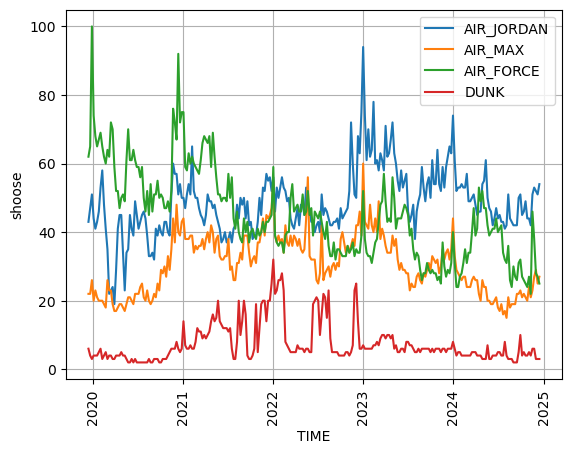

In [15]:
fig,ax = plt.subplots()
plt.xticks(rotation=90)

ax.plot(TIME, AIR_JORDAN, label = "AIR_JORDAN" )
ax.plot(TIME, AIR_MAX, label = "AIR_MAX" )
ax.plot(TIME, AIR_FORCE, label = "AIR_FORCE" )
ax.plot(TIME, DUNK, label = "DUNK" )

ax.set_xlabel("TIME")
ax.set_ylabel("shoose")

ax.grid(True)
ax.legend(loc='upper right')

plt.show()

In [16]:
Data_Check.head()

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
0,43,22,62,6
1,47,22,65,4
2,51,26,100,3
3,44,20,74,4
4,41,23,68,4


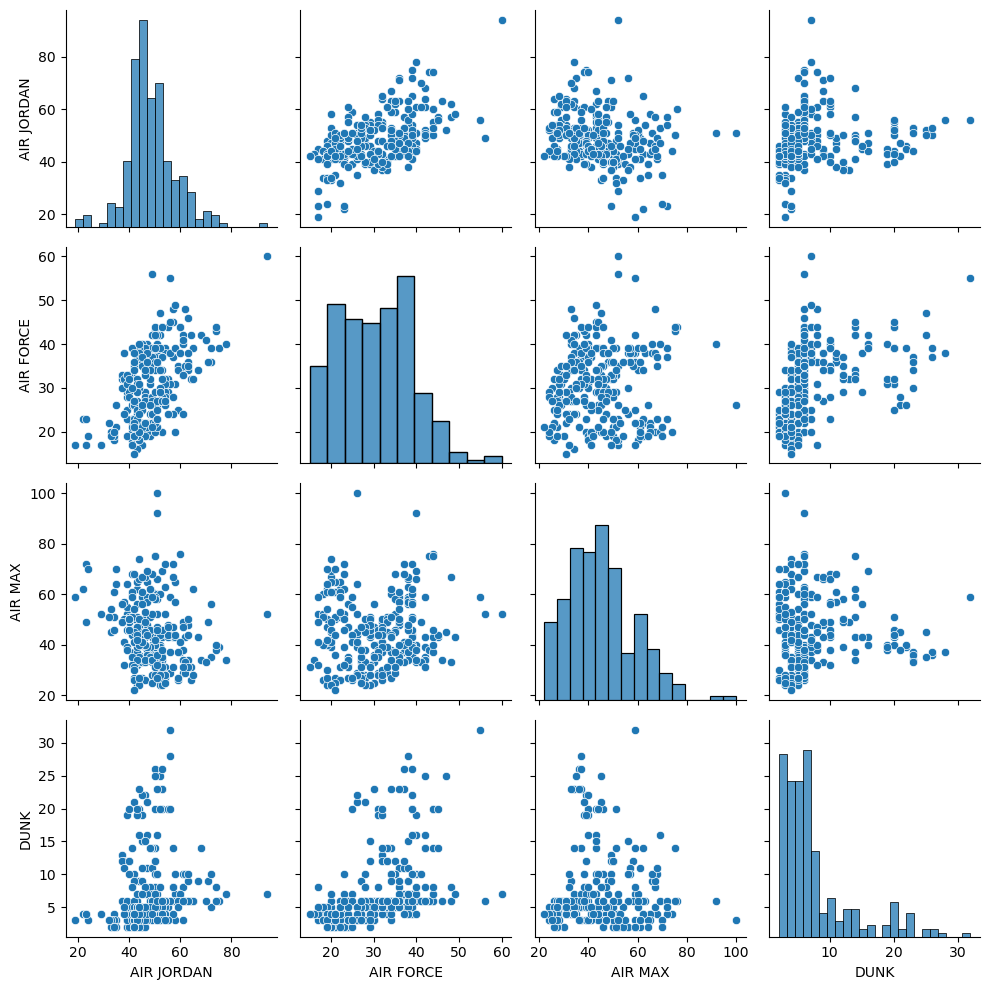

In [17]:
# ペアプロットの作成
sns.pairplot(Data_Check)

# グラフの表示
plt.tight_layout()
plt.show()

In [18]:
Corr_matrix = Data_Check.corr()
Corr_matrix

,AIR JORDAN,AIR FORCE,AIR MAX,DUNK
AIR JORDAN,1.000000,0.541493,-0.216011,0.128218
AIR FORCE,0.541493,1.000000,0.064255,0.475298
AIR MAX,-0.216011,0.064255,1.000000,-0.022517
DUNK,0.128218,0.475298,-0.022517,1.000000


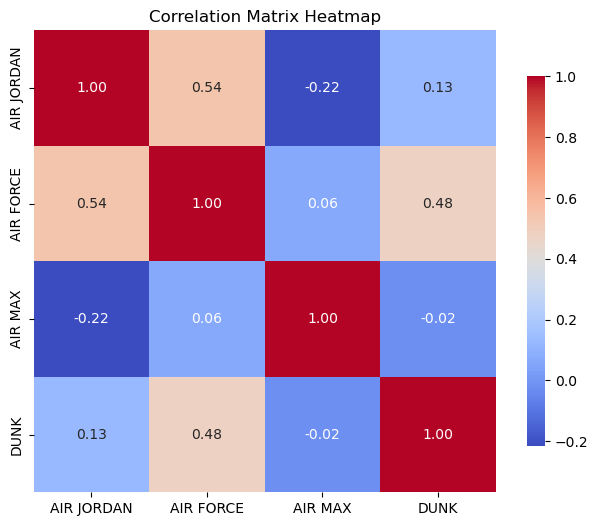

In [19]:
# ヒートマップの描画
plt.figure(figsize=(8, 6))  # 図のサイズを指定
sns.heatmap(Corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
from itertools import combinations# 要素のリスト
elements = ['AIR_JORDAN', 'AIR_MAX', 'AIR_FORCE', 'DUNK']

# 2つを選ぶ組み合わせを生成
combinations_list = list(combinations(elements, 2))

# 結果を表示
print("組み合わせの数:", len(combinations_list))
print("組み合わせ一覧:", combinations_list)

組み合わせの数: 6
組み合わせ一覧: [('AIR_JORDAN', 'AIR_MAX'), ('AIR_JORDAN', 'AIR_FORCE'), ('AIR_JORDAN', 'DUNK'), ('AIR_MAX', 'AIR_FORCE'), ('AIR_MAX', 'DUNK'), ('AIR_FORCE', 'DUNK')]


In [21]:
Data_Check.shape

(262, 4)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
#AIR JORDAN とAIR MAXのデータの単回帰分析

X_train,X_test,Y_train,Y_test = train_test_split( AIR_JORDAN , AIR_MAX , test_size = 0.2 ,random_state = 42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(209,)
(53,)
(209,)
(53,)


In [34]:
# X_trainを2次元に変換
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [35]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [36]:
# 予測
y_pred = model.predict(X_test)
y_pred

array([27.74462158, 32.99020472, 32.99020472, 35.37456069, 28.69836397,
       30.12897756, 39.66640145, 32.03646233, 30.60584875, 32.51333353,
       29.17523517, 29.17523517, 26.79087919, 32.99020472, 32.03646233,
       31.08271994, 26.79087919, 29.65210636, 38.71265906, 27.74462158,
       27.74462158, 30.12897756, 29.17523517, 32.51333353, 32.99020472,
       30.12897756, 25.83713681, 29.17523517, 31.55959114, 16.77658411,
       28.22149278, 35.85143189, 36.80517428, 32.99020472, 28.69836397,
       29.65210636, 30.60584875, 29.17523517, 37.28204547, 27.26775039,
       31.55959114, 28.22149278, 28.69836397, 28.22149278, 27.26775039,
       52.5419237 , 30.12897756, 29.17523517, 30.60584875, 27.74462158,
       27.74462158, 36.80517428, 32.99020472])

In [38]:
# モデルの評価
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 55.39476230149048


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

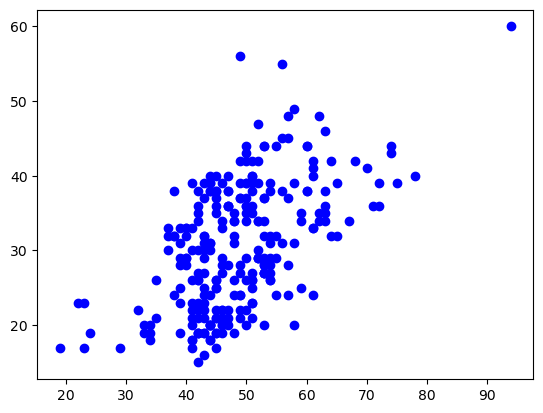

In [40]:
# 回帰直線の可視化
plt.scatter(AIR_JORDAN, AIR_MAX, color='blue')  # データポイント
plt.plot(AIR_JORDAN, model.predict(AIR_JORDAN), color='red')  # 回帰直線
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.title('Simple Linear Regression')
plt.show()